# Introducing Image Processing and scikit-image
> Jump into digital image structures and learn to process them! Extract data, transform and analyze images using NumPy and Scikit-image. With just a few lines of code, you will convert RGB images to grayscale, get data from them, obtain histograms containing very useful information, and separate objects from the background! This is the Summary of lecture "Image Processing in Python", via datacamp.

- toc: true
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Scikit-Image, Vision]
- image: images/try_threshold.png

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Make images come alive with scikit-image
- Purpose
    - Visualization: Objects that are note visible
    - Image sharpening and restoration: A better image
    - Image retrieval: Seek for the image of interest
    - Measurement of pattern: Measures various objects
    - Image recognition: Distinguish objects in an image
- Scikit-Image
    - Easy to use
    - Make use of ML
    - Out of the box complex algorithm

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import skimage as ski

### Is this gray or full of color?
Whats the main difference between the images shown below?
![cc](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/coffeandcoins.png?raw=1)

These images have been preloaded as coffee_image and coins_image from the scikit-image data module using:
```python
coffee_image = data.coffee()
coins_image = data.coins()
```

In [4]:
coffee_image = ski.data.coffee()
coins_image = ski.data.coins()

In [5]:
!pip install opencv-python

In [6]:
!pip install pillow

In [7]:
!pip install matplotlib

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [9]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/image/coffeandcoins.png")

In [10]:
def show_image(img, title='Image', cmap_type='gray'):
    plt.imshow(img, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

In [11]:
print(f'image shape:{img.shape}')

image shape:(261, 709, 3)


### RGB to grayscale
In this exercise you will load an image from scikit-image module data and make it grayscale, then compare both of them in the output.
![rocket](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/rocket.png?raw=1)

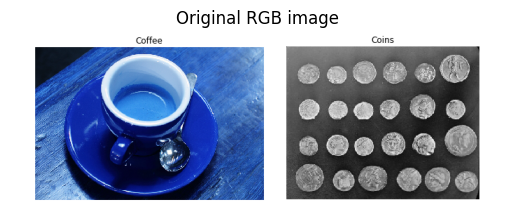

In [12]:
from skimage import data, color

# Convert the image to grayscale
gray_scaled_img = color.rgb2gray(img)

# Show the original image
show_image(img, 'Original RGB image');

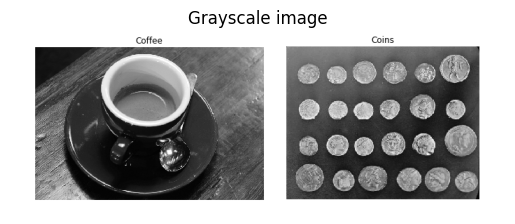

In [13]:
# Show the grayscale image
show_image(gray_scaled_img, 'Grayscale image')

## NumPy for images

### Flipping out
As a prank, someone has turned an image from a photo album of a trip to Seville upside-down and back-to-front! Now, we need to straighten the image, by flipping it.
![seville](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/sevilleup.jpg?raw=1)
Using the NumPy methods learned in the course, flip the image horizontally and vertically. Then display the corrected image using the `show_image()` function.

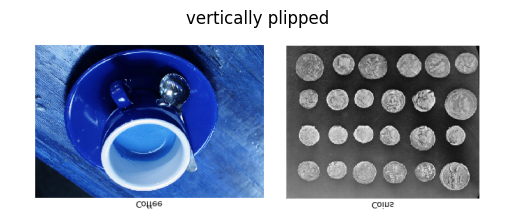

In [14]:
# Flip the image vertically
img_vertical_flip = np.flipud(img)

# Show the resulting image
show_image(img_vertical_flip, 'vertically plipped')

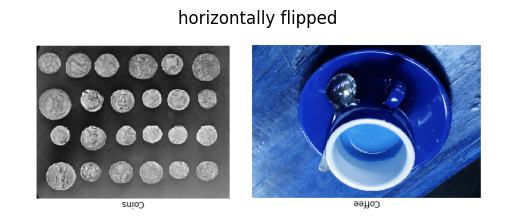

In [15]:
# Flip the previous image horizontally
img_horizontal_flip = np.fliplr(img_vertical_flip)
# Show the resulting image
show_image(img_horizontal_flip, 'horizontally flipped')

### Histograms
Pada praktikum ini, kita akan melakukan analisis jumlah dari warna merah didalam citra/gambar. Untuk Itu, Histogram dari chanel warna merah akan dihitung dan ditampilkan:
![portrait](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/portrait.png?raw=1)
Ekstraksi Informasi dari citra merupakan dasar-dasar bagi peningkatan kualitas citra (image enhancement), misalnya dengan menyeimbangkan warna merah dan biru membuat citra menjadi lebih dingin atau hangat.

Gunakan `hist()` untuk menampilkan 256 intensitas yang berbeda  intensities of the red color. And `ravel()` to make these color values an array of one flat dimension.


In [16]:
image = plt.imread('./dataset/portrait.png')

# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='red');

# Set title
plt.title('Red Histogram');

FileNotFoundError: [Errno 2] No such file or directory: './dataset/portrait.png'

With this histogram we see that the image is quite reddish, meaning it has a sensation of warmness. This is because it has a wide and large distribution of bright red pixels, from 0 to around 150.

## Getting started with thresholding
- Thresholding
    - Partitioning an image into a foregraound and background
    - By making it black and white
    - Simplest method of image segmentation

### Apply global thresholding
Apply global thresholding
In this exercise, you'll transform a photograph to binary so you can separate the foreground from the background.

To do so, you need to import the required modules, load the image, obtain the optimal thresh value using `threshold_otsu()` and apply it to the image.

You'll see the resulting binarized image when using the `show_image()` function, previously explained.
![chess](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/bw.jpg?raw=1)

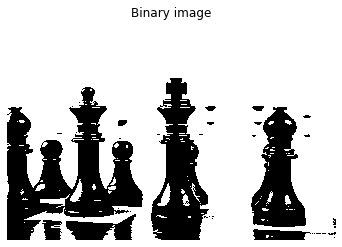

In [ ]:
from skimage.filters import threshold_otsu

chess_pieces_image = plt.imread('./dataset/bw.jpg')

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = color.rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image #true atau false
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

### When the background isn't that obvious
Sometimes, it isn't that obvious to identify the background. If the image background is relatively uniform, then you can use a global threshold value as we practiced before, using `threshold_otsu()`. However, if there's uneven background illumination, adaptive thresholding `threshold_local()` (a.k.a. local thresholding) may produce better results.

In this exercise, you will compare both types of thresholding methods (global and local), to find the optimal way to obtain the binary image we need.
![page](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/text_page.png?raw=1)

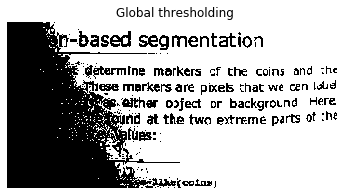

In [ ]:
page_image = plt.imread('./dataset/text_page.png')

# Make the image grayscale using rgb2gray
page_image = color.rgb2gray(page_image)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

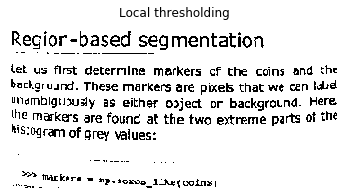

In [ ]:
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=0.1)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

### Trying other methods
As we saw in the video, not being sure about what thresholding method to use isn't a problem. In fact, scikit-image provides us with a function to check multiple methods and see for ourselves what the best option is. It returns a figure comparing the outputs of different global thresholding methods.
![fruit](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/fruits-2.jpg?raw=1)



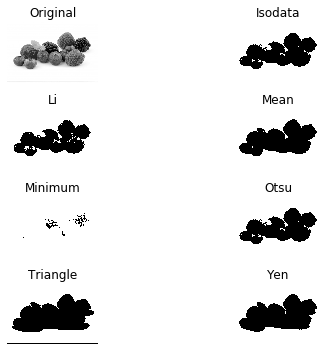

In [ ]:
from skimage.filters import try_all_threshold

fruits_image = plt.imread('./dataset/fruits-2.jpg')

# Turn the fruits_image to grayscale
grayscale = color.rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False);

### Apply thresholding
In this exercise, you will decide what type of thresholding is best used to binarize an image of knitting and craft tools. In doing so, you will be able to see the shapes of the objects, from paper hearts to scissors more clearly.

![tool](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/shapes52.jpg?raw=1)
What type of thresholding would you use judging by the characteristics of the image? Is the background illumination and intensity even or uneven?

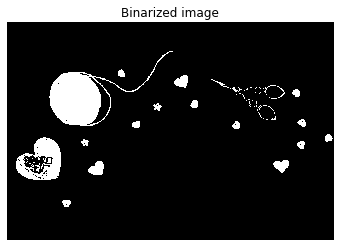

In [ ]:
tools_image = plt.imread('./dataset/shapes52.jpg')

# Turn the image grayscale
gray_tools_image = color.rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

By using a global thresholding method, you obtained the precise binarized image. If you would have used local instead nothing would have been segmented.